# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [6]:
params = {'legend.fontsize': 6,
                  "figure.autolayout": True,
                  'font.size': 8,
                  'pdf.fonttype':42,
                  'ps.fonttype':42}
plt.rcParams.update(params)

cm = 1 / 2.54  # for converting inches to cm
fig_size = (10.48 * cm, 6 * cm)  # these dimensions chosen to fit in latex column
    

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [7]:
all_experiments = ["/media/elena/LaCie/aamas_2023/paper/align_3_landmarks", "/media/elena/LaCie/aamas_2023/paper/align_6_landmarks",  "/media/elena/LaCie/aamas_2023/paper/scaling"]
all_experiments = [  "/media/elena/LaCie/aamas_2023/paper/scaling"]
#all_experiments = ["/media/elena/LaCie/aamas_2023/6_landmarks/cooperative/4"]

#experiments_dir = "/media/elena/LaCie/elias_expe/2_agents/cooperative/modified_reward/3_landmarks"
#list_of_experiments = ["centralized","independent","50align","naming_game_t30_a10"]

#list_of_experiments = ["centralized","independent"]

['naming_game', 'centralized', 'independent']
2022-10-17_01-08-59rmytjazf
2022-10-17_01-08-599ln_vwby
2022-10-17_01-08-59iopc24mz
2022-10-17_01-08-59fhed13in
2022-10-17_01-08-59709d94ze
naming_game
2022-09-26_02-19-15qi3agifm
2022-09-26_02-19-09mcl2lx2k
2022-09-26_02-19-16sb3f0a_3
2022-09-26_02-19-150y4kooga
2022-09-26_02-19-15w_br6grf
centralized
2022-09-26_02-19-16uvmylmf7
2022-09-26_02-19-152c4lawa8
2022-09-26_02-19-15jrkmnw7v
2022-09-26_02-19-15r0_0c8qv
2022-09-26_02-19-169fmfia44
independent
[600000, 1200000, 1800000, 2400000, 3000000, 3600000, 4200000, 4800000, 5400000, 6000000, 6600000, 7200000, 7800000, 8400000, 9000000, 9600000, 10200000, 10800000, 11400000, 12000000, 12600000, 13200000, 13800000, 14400000, 15000000, 15600000, 16200000, 16800000, 17400000, 18000000, 18600000, 19200000, 19800000, 20400000, 21000000, 21600000, 22200000, 22800000, 23400000, 24000000, 24600000, 25200000, 25800000, 26400000, 27000000, 27600000, 28200000, 28800000, 29400000, 30000000, 30600000, 3120

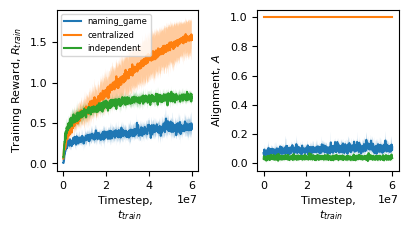

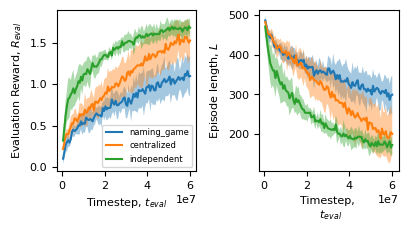

In [8]:
for experiments_dir in all_experiments:
    list_of_experiments =  [o for o in os.listdir(experiments_dir) if os.path.isdir(experiments_dir + "/" + o)]
    print(list_of_experiments)
    results = {}
    for experiment in list_of_experiments:
        subdir = os.path.join(experiments_dir, experiment)
        eval_reward = pd.DataFrame()
        train_reward = pd.DataFrame()
        episode_len = pd.DataFrame()
        alignment = pd.DataFrame()
        train_x = []
        eval_x = []
        ctr=0
        for j, experiment_name in enumerate(os.listdir(subdir)):

            #print(subdir+"/"+experiment_name)
            if(os.path.isdir(subdir+"/"+experiment_name)):

                ctr+=1
                if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):

                    if( True):
                        print(experiment_name)

                        r = []
                        r_t = []
                        l = []
                        x_ = []
                        a = []
                        y_ = []
                        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")
                        #print(result_raw)

                        for result in result_raw:
                            dump = json.loads(result)

                            #if(ctr>5):
                                #print(dump.keys())
                            a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                            y_.append(dump["timesteps_total"])
                            r_t.append(dump["episode_reward_mean"])

                            metrics = dump.get("evaluation")
                            if metrics is not None:
                                custom = metrics.get("custom_metrics")
                                x_.append(dump["timesteps_total"])
                                r.append(metrics["episode_reward_mean"])
                                l.append(metrics["episode_len_mean"])

                        eval_reward = pd.concat(
                            [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                        )
                        episode_len = pd.concat(
                            [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                        )
                        alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                        train_reward = pd.concat(
                            [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                        )


                        if len(x_) > len(eval_x):
                            eval_x = x_
                        if len(y_) > len(train_x):
                            train_x = y_
        print(experiment)
        results[experiment] = {
            "eval_reward": eval_reward,
            "train_reward": train_reward,
            "episode_len": episode_len,
            "alignment": alignment,
            "train_x": train_x,
            "eval_x": eval_x,
        }
        
    plt.figure(figsize=fig_size)

    slice=1000

    i = 1
    n_exp = len(results)
    for label, result in results.items():
        if "naming_game" in label:
            if "2_steps" in label:
                label_to_print = "naming_game_2step"
            else:
                label_to_print = "naming_game"
        else:
            label_to_print = label


        plt.subplot(121)
        plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label_to_print)
        plt.fill_between(
            result["train_x"][:slice],
            result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
            result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            #plt.grid()
            plt.ylabel("Training Reward, $R_{train}$")
            plt.xlabel("Timestep, \n $t_{train}$")

        plt.subplot(122)



        plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label_to_print)
        plt.fill_between(
            result["train_x"][:slice],
            result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
            result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            #plt.legend()
            #plt.grid()
            plt.ylabel("Alignment, $A$")
            plt.xlabel("Timestep,\n  $t_{train}$")

        i += 1

    plt.tight_layout()
    # Uncomment this line for saving the plot
    plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)
    
    
    plt.figure(figsize=fig_size)
    slice=100
    i = 1
    n_exp = len(results)
    for label, result in results.items():
        if "naming_game" in label:
            if "2_steps" in label:
                label_to_print = "naming_game_2step"
            else:
                label_to_print = "naming_game"
                print(result["eval_x"], result["eval_reward"])
        else:
            label_to_print = label
        ax=plt.subplot(121)
        plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label_to_print)
        plt.fill_between(
            result["eval_x"][:slice],
            result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
            result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            #plt.grid()
            plt.xlabel("Timestep, $t_{eval}$")
            plt.ylabel("Evaluation Reward, $R_{eval}$")

        plt.subplot(122)
        plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label_to_print)
        plt.fill_between(
            result["eval_x"][:slice],
            result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
            result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            #plt.legend()
            #plt.grid()
            plt.xlabel("Timestep, \n $t_{eval}$")
            plt.ylabel("Episode length, $L$")
        i += 1

    plt.tight_layout()
    # Uncomment this line for saving the plot
    plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Training plots

Eval plots